# Ejercicio 2

**1) Using the acceptance/rejection method, generate a random variable that is distributed according to the following probability density function:**

$f(x)=\frac{2}{\pi}\sqrt{1-x^2}$ con $x\in[-1, 1]$.

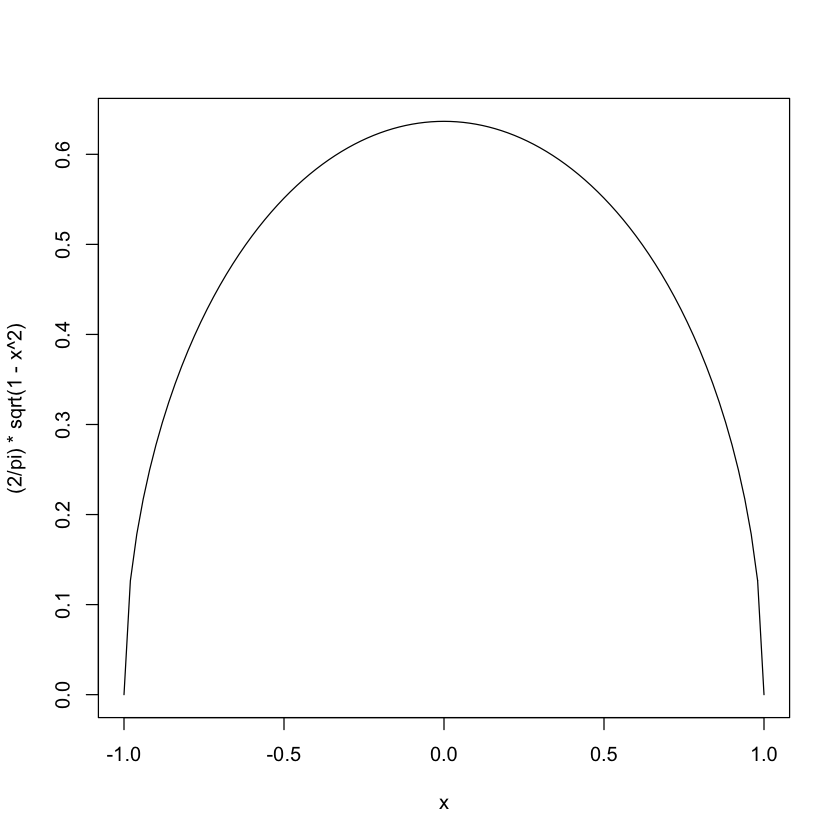

In [34]:
curve((2/pi)*sqrt(1-x^2),-1,1)


**Draw the histogram of generated values (10000 accepted), which should be in the shape of a half ellipse.**

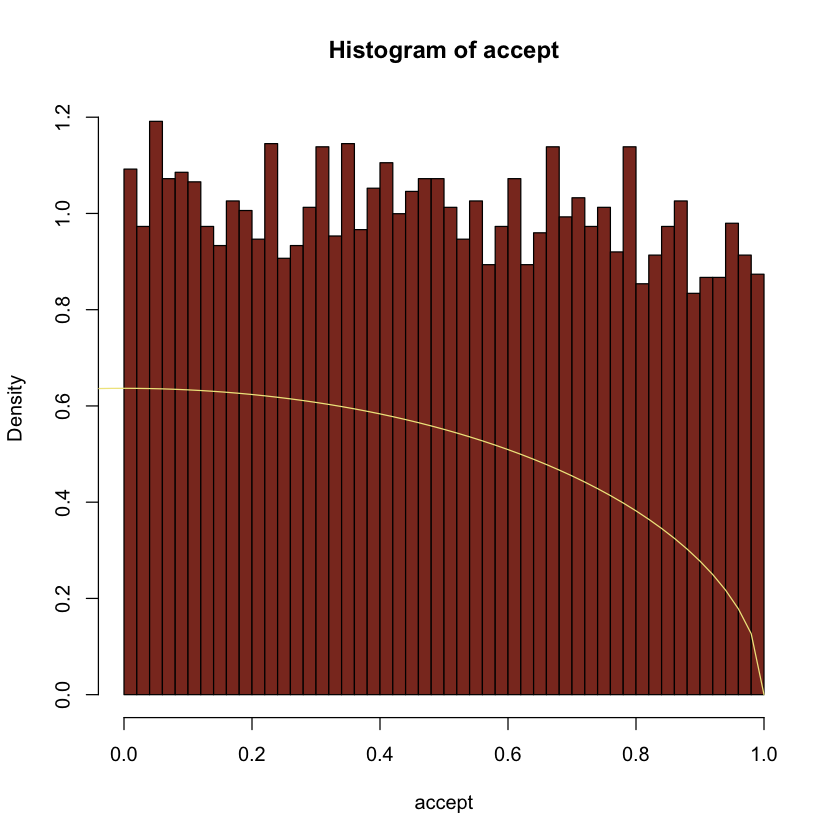

In [56]:
X = runif(20000,0,1)
U = runif(20000,0,1)

pi_x <- function(x){
    new_x = (2/pi)*sqrt(1-x^2)
    return(new_x)
}

count = 1 
accept = c()

while(count <= 20000 & length(accept) < 10000){
    test_u = U[count]
    test_x = pi_x(X[count]/-1*dunif(X[count],-1,1))
    if (test_u <= test_x){
    accept = rbind(accept, X[count])
    count = count + 1 
}
    count = count + 1
}

hist(accept, freq=FALSE, breaks=50, col="tomato4")
curve((2/pi)*sqrt(1-x^2), from=-1, to=1, col="khaki", add=TRUE)

**2) Try to generate the same distribution and number of values (10000) with a Metropolis algorithm, choosing a 'jumping distribution' that allows you to obtain higher generation efficiency than the previous method.**

In [60]:
circle <- function(x,y){
    value = (2/pi)*(sqrt(1-x^2))
    return(value)
}

    x=-1
    y=1
    
    target_x <- 0 
    target_y <- 0 
    
    N = 10000
    k = 1
    while(k <= N){
        x_star = x + rnorm(1,0,1)
        y_star = y + rnorm(1,0,1)
        
        if(runif(1,0,1) < circle(x_star, y_star)/circle(x,y)){
            x = x_star
            y = y_star
            target_x[k] <- x 
            target_y[k] <- y 
            k = k + 1
        }
    }

Warning message in sqrt(1 - x^2):
“NaNs produced”

ERROR: Error in if (runif(1, 0, 1) < circle(x_star, y_star)/circle(x, y)) {: missing value where TRUE/FALSE needed
